<a href="https://colab.research.google.com/github/myllanes/ECGR4105M.Y/blob/main/Notebooks/Exercise_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Michael Yllanes

In [19]:
import numpy as np
import torch

In [20]:
# t_c is the temperature in celcius; this is our known output.
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
# t_u is the temperature in unknown unit; this is our feature.
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

# Try yourself: Convert these arrays into tensors.
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [21]:
# model definition based on weight w and bias b
def model(t_u, w, b):
    return w * t_u + b

In [22]:
# Loss definition
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [23]:
w = torch.ones(())
b = torch.zeros(())

# t_p is the predicted output for the current value of w and b
t_p = model(t_u, w, b)
# Try yourself: print the predicted values t_p

print(t_p)

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])


In [24]:
loss = loss_fn(t_p, t_c)
# Try yourself: print loss
print(loss)

tensor(1763.8848)


In [25]:
# let's normalize the input; you can use the standard way to do normalization; Here we have done a crude normalization so that our two featues are in the similar range.
t_un = 0.1*t_u

In [26]:
from typing_extensions import ParamSpec
# here we define an optimizer for optimizing the parameters of our linear model
import torch.optim as optim
params = torch.tensor([w,b],requires_grad=True)  # notice that requires_grad defines that it is associated with a graph and gradeint will be computed when we call the step function.
learning_rate = 1e-5
optimizer = optim.SGD([params],lr = learning_rate)
# try yourself: print the params.
print(params)
# try yourself: print the gradient.
print(params.grad)

tensor([1., 0.], requires_grad=True)
None


In [27]:
# Let's do one iteration of training: one forward and one backward pass to update the gradient and the parameters.
t_p = model(t_u,*params)
loss = loss_fn(t_p,t_c)
loss.backward()
# try yourself: print the params. Have the values been updated?
print(params)
# try yourself: print the gradient. Have the values been updated?
print(params.grad)
optimizer.step()
# try yourself: print the params. Have the values been updated?
print(params)
# try yourself: print the gradient. Have the values been updated?
print(params.grad)



tensor([1., 0.], requires_grad=True)
tensor([4517.2969,   82.6000])
tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)
tensor([4517.2969,   82.6000])


In [28]:
# Now we will do training for 5000 iteration to find the optimum value of the parameters.
def training_loop(n_epochs, optimizer, params, t_u,t_c):
  for epoch in range(1,n_epochs+1):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p,t_c)
    optimizer.zero_grad()
    loss.backward() # compute graduate
    optimizer.step() # get loss

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
      print(params)
      print(params.grad)
  return params

In [33]:
params = torch.tensor([w,b],requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params],lr = learning_rate)
# Try yourself: call training_loop function for 5000 epochs.
training_loop(5000, optimizer = optimizer, params = params, t_u = t_un,t_c = t_c)
# Try yourself: print the params values
print(params)

Epoch 500, Loss 7.860120
tensor([ 4.0443, -9.8133], requires_grad=True)
tensor([-0.2252,  1.2748])
Epoch 1000, Loss 3.828538
tensor([  4.8021, -14.1031], requires_grad=True)
tensor([-0.0962,  0.5448])
Epoch 1500, Loss 3.092191
tensor([  5.1260, -15.9365], requires_grad=True)
tensor([-0.0411,  0.2328])
Epoch 2000, Loss 2.957698
tensor([  5.2644, -16.7200], requires_grad=True)
tensor([-0.0176,  0.0995])
Epoch 2500, Loss 2.933134
tensor([  5.3236, -17.0549], requires_grad=True)
tensor([-0.0075,  0.0425])
Epoch 3000, Loss 2.928648
tensor([  5.3489, -17.1980], requires_grad=True)
tensor([-0.0032,  0.0182])
Epoch 3500, Loss 2.927830
tensor([  5.3597, -17.2591], requires_grad=True)
tensor([-0.0014,  0.0078])
Epoch 4000, Loss 2.927679
tensor([  5.3643, -17.2853], requires_grad=True)
tensor([-0.0006,  0.0033])
Epoch 4500, Loss 2.927652
tensor([  5.3662, -17.2964], requires_grad=True)
tensor([-0.0003,  0.0014])
Epoch 5000, Loss 2.927647
tensor([  5.3671, -17.3012], requires_grad=True)
tensor([-9

## Training and Validation in PyTorch

In [37]:
# splitting a dataset into 8:2 ratio
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
# Try yourself: print train_indices and val_indices. see if the number of training and validation match with our intended ratio
print(train_indices)
print(val_indices)

tensor([10,  8,  2,  3,  7,  5,  9,  0,  4])
tensor([1, 6])


In [38]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

In [39]:
# crude normalization
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [40]:
def training_loop(n_epochs, optimizer, params, train_t_u,val_t_u, train_t_c,val_t_c):
  for epoch in range(1,n_epochs+1):

    # Try yourself: identif (i) where we are doing forward pass on the training data,
    # (ii)  where we are doing forward pass on the validation data,
    # (iii) where we are computing the gradient on training data
    # (iv) and where we are updating the paramter values on training data (iii and iV constitute the backward pass)
    # (v) where we are doing the backwass pass on validation data(NO BACKWARD PASS)

    train_t_p = model(train_t_u, *params) #forward pass i.
    train_loss = loss_fn(train_t_p, train_t_c)

    val_t_p = model(val_t_u, *params) #validation data ii.
    val_loss = loss_fn(val_t_p, val_t_c)


    optimizer.zero_grad()
    train_loss.backward() #iii.
    optimizer.step() #iv

    if epoch<= 3 or epoch % 500 == 0:
      print('Epoch %d, Training Loss %f, Validation Loss %f' % (epoch, float(train_loss), float(val_loss)))
      print(params)
      print(params.grad)
  return params

In [48]:
params = torch.tensor([1.0,0.0],requires_grad = True)
learning_rate = 1e-2
optimizer = optim.SGD([params],lr = learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

# try yourself: print the final values of the parameters. What will be the predicted output if the temperature at unknow unit is 80.
print("********************************")
print(params)
t_p = model(80*0.1, *params)
print(t_p)

Epoch 1, Training Loss 90.347511, Validation Loss 35.440098
tensor([1.8471, 0.1122], requires_grad=True)
tensor([-84.7083, -11.2222])
Epoch 2, Training Loss 40.743099, Validation Loss 12.037375
tensor([2.1537, 0.1318], requires_grad=True)
tensor([-30.6631,  -1.9622])
Epoch 3, Training Loss 34.299850, Validation Loss 11.497887
tensor([2.2670, 0.1184], requires_grad=True)
tensor([-11.3236,   1.3478])
Epoch 500, Training Loss 8.272358, Validation Loss 1.006234
tensor([  4.1578, -10.5504], requires_grad=True)
tensor([-0.2337,  1.3630])
Epoch 1000, Training Loss 3.695302, Validation Loss 2.058008
tensor([  4.9418, -15.1231], requires_grad=True)
tensor([-0.0992,  0.5784])
Epoch 1500, Training Loss 2.870973, Validation Loss 3.627670
tensor([  5.2745, -17.0637], requires_grad=True)
tensor([-0.0421,  0.2455])
Epoch 2000, Training Loss 2.722513, Validation Loss 4.496119
tensor([  5.4157, -17.8873], requires_grad=True)
tensor([-0.0179,  0.1042])
Epoch 2500, Training Loss 2.695773, Validation Loss

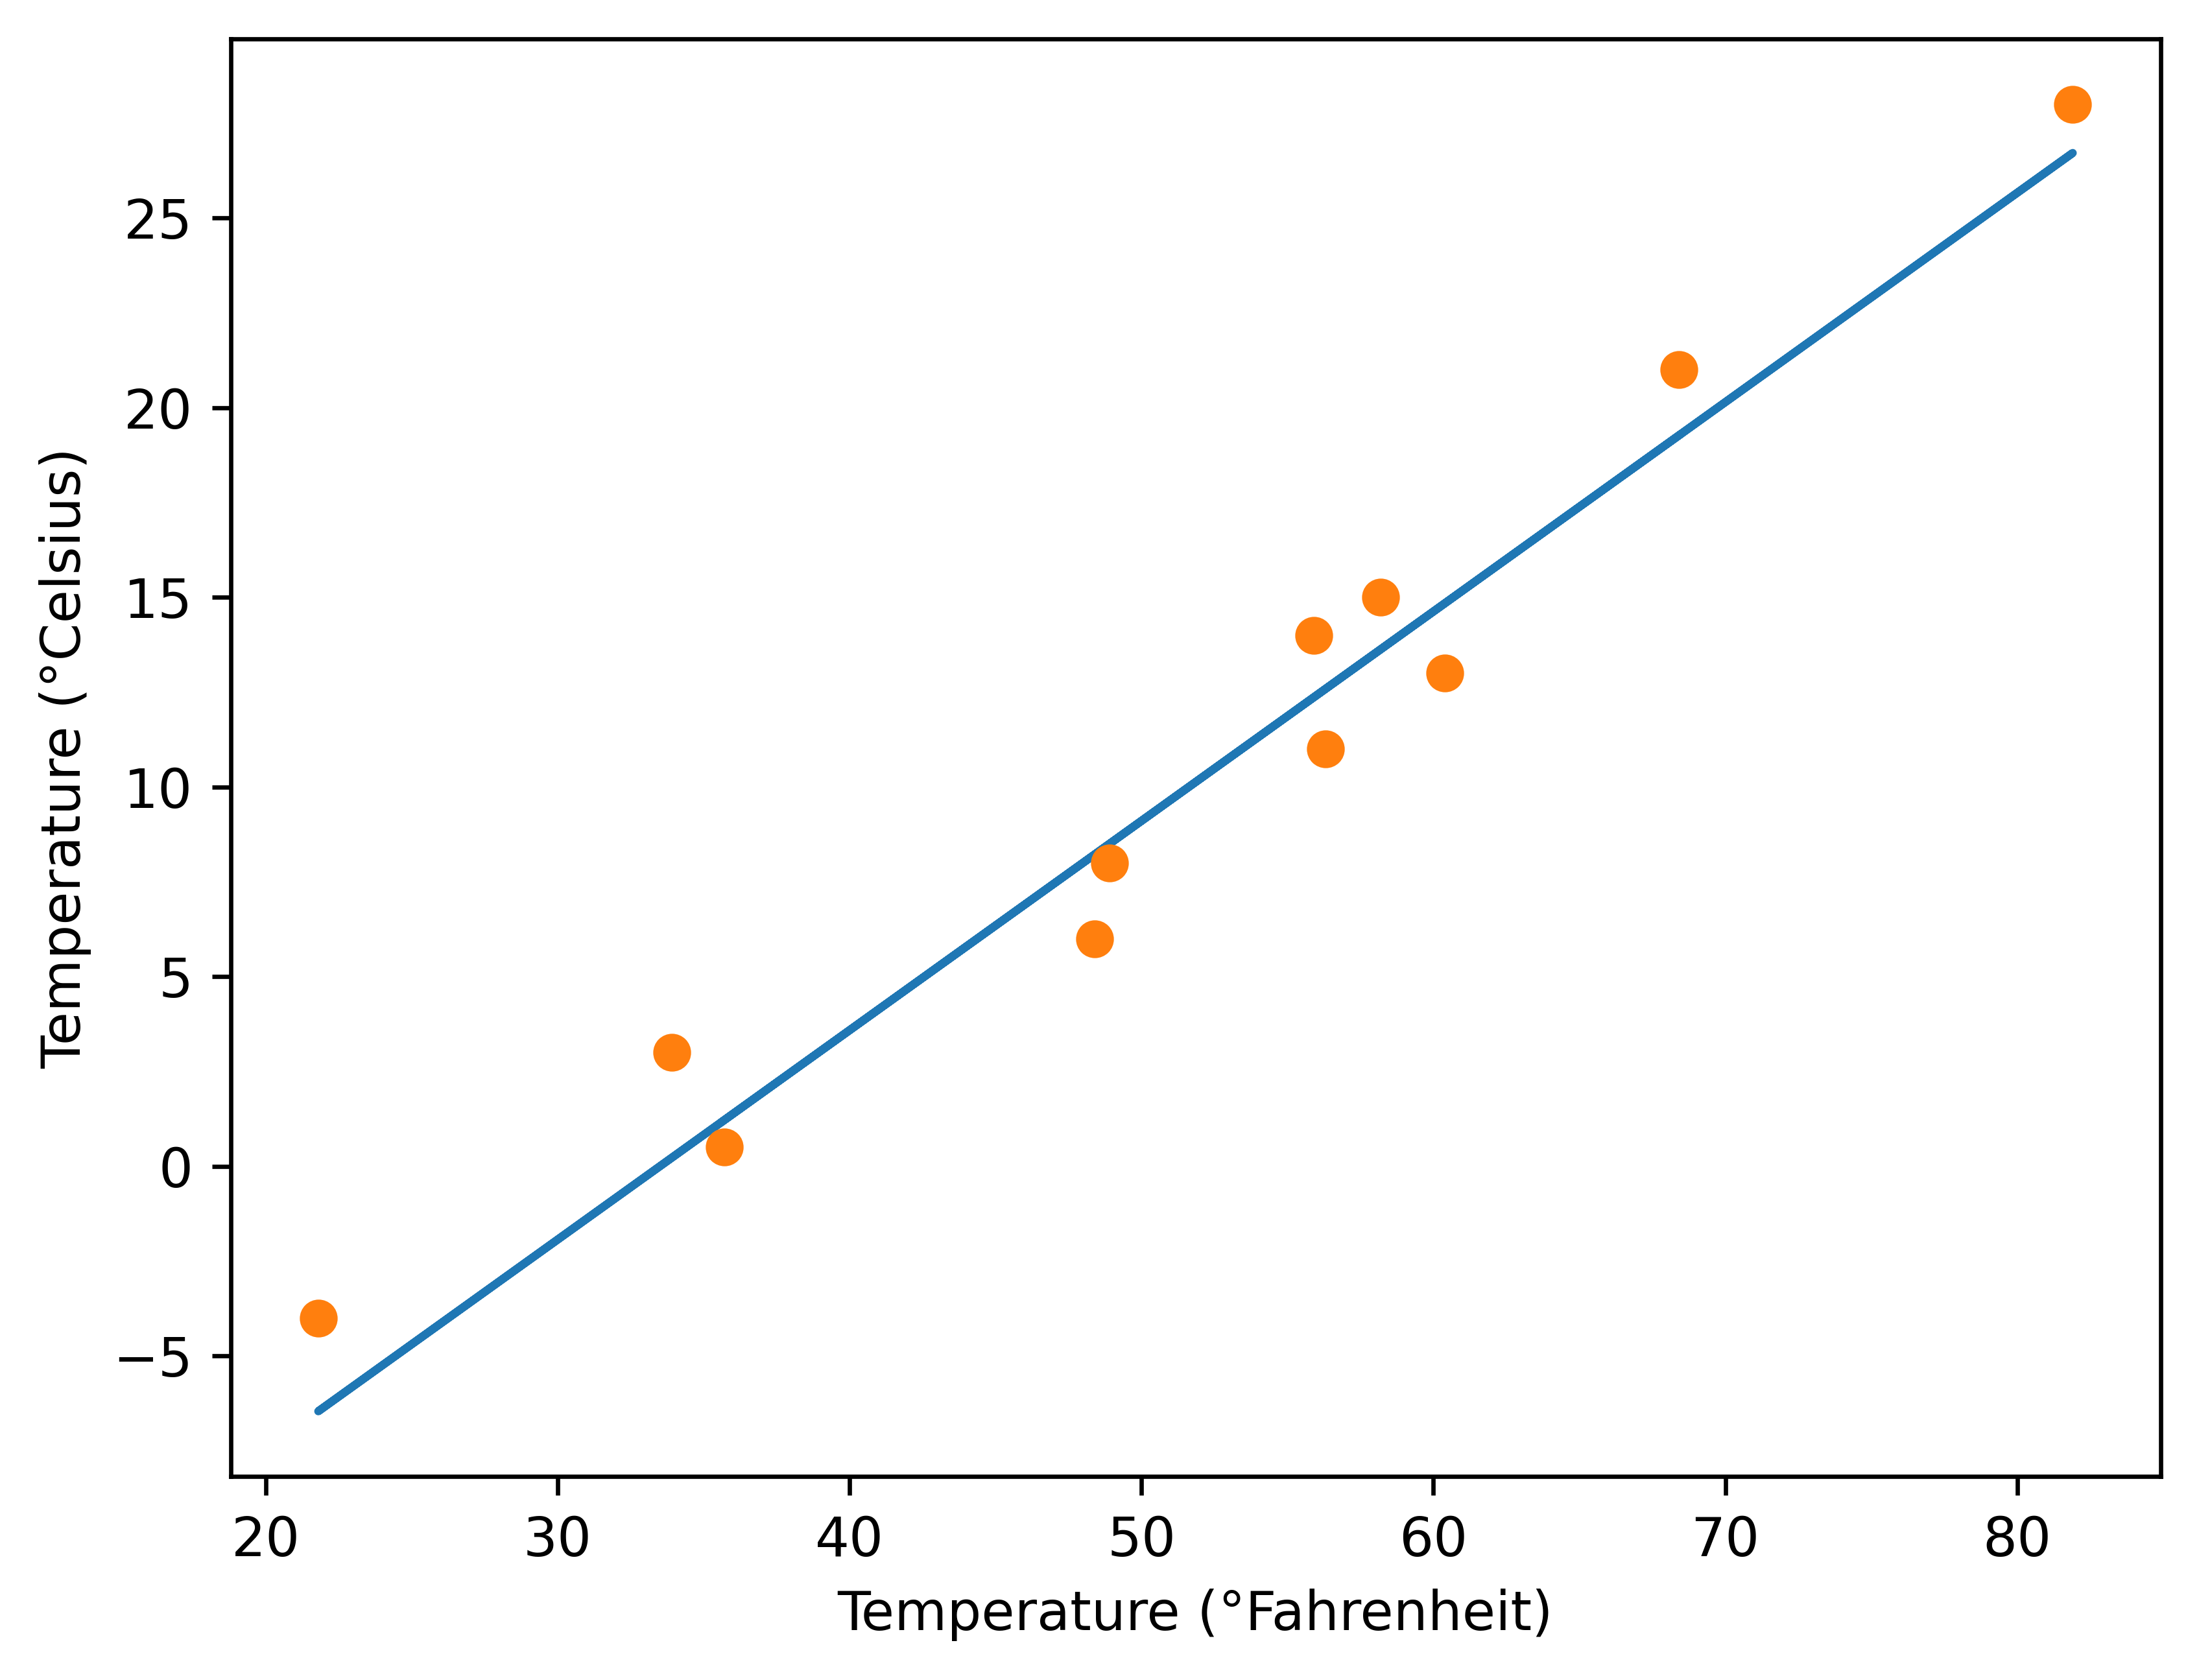

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')